https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8
    https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas
        https://github.com/rtavenar/tslearn
            https://www.kaggle.com/egregori/clustering-time-series

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# 8 am 12 pm: 24 time slot speed data 
speed = pd.read_csv('hist_speed_imputed_nbr.txt',delimiter='\s+', header=None, index_col=False)
road_ftrs = pd.read_csv('../dataset/Road/Roadfeature.txt',delimiter='\s+', header=None, index_col=False)
road_ftr = road_ftrs.loc[:,0:7]
road_ftr.columns =[['r_id','lng','lanes','max_spd','dir','lev','tor','n_cn']]

In [ ]:
# road_ftr[road_ftr.lev<=1]
# road_ftr.query('lev' <= 1)
road_ftr.head()

,r_id,lng,lanes,max_spd,dir,lev,tor,n_cn
0,0,261.877396,2,5.555556,1,3,1.002687,4
1,1,178.270215,1,5.555556,1,3,1.000207,2
2,2,6.053683,3,19.444444,0,2,1.000000,4
3,3,8.725633,4,19.444444,0,2,1.000001,6
4,4,442.084671,3,19.444444,0,2,1.000091,6


In [ ]:
speed

,0,1,2,3,4,5,6,7,8,9,...,81583,81584,81585,81586,81587,81588,81589,81590,81591,81592
0,2.536792,5.103423,8.828940,5.092275,8.894114,3.163509,0.472230,9.177182,4.421228,10.417844,...,2.754259,13.168823,12.151662,4.783225,8.715493,7.183343,15.168612,14.055518,12.654190,13.842023
1,2.536792,5.624394,7.980195,5.011661,9.979667,4.645066,1.664250,7.447552,3.977937,9.677457,...,0.798043,12.502764,13.069864,5.470120,4.066974,5.022301,14.992654,14.489677,14.311808,13.747519
2,2.645495,4.312880,7.600021,3.010578,10.548084,1.681952,3.903447,7.856210,7.596288,11.476380,...,1.311338,13.870441,13.410543,6.293779,5.914057,4.428738,13.336924,15.405235,10.239477,9.822859
3,2.401586,3.943209,6.681925,5.567814,7.512403,2.207521,1.182314,6.694858,3.759230,13.152567,...,2.158810,15.321982,14.166958,5.166970,7.591885,5.293462,13.436750,15.844602,10.105091,12.518583
4,2.862901,5.092093,7.266834,7.161416,10.212902,1.052743,2.372027,6.817552,4.818343,15.157232,...,7.974675,14.327966,17.726496,6.948707,5.557213,3.968743,15.410073,14.237376,13.111311,13.106872
5,1.561155,5.354177,7.466857,4.867362,10.375331,1.450325,2.519006,6.530164,6.069100,5.651490,...,8.112809,15.458158,14.072364,6.890530,6.679876,3.117152,14.858754,14.792133,14.691097,11.873595
6,2.674700,5.223135,8.253041,6.871308,6.368112,1.283134,2.678873,8.043868,5.984177,10.949668,...,7.319593,14.348099,11.963041,5.303618,5.846902,3.065664,16.725783,16.277966,11.500251,13.497455
7,3.600045,5.356402,3.956144,6.133994,10.480971,2.089516,1.233729,7.453059,5.302714,8.101327,...,0.268874,14.269286,14.480610,7.142134,6.229965,3.414275,14.816401,13.890175,11.468229,13.941761
8,2.570877,5.289769,12.157415,7.816200,7.144310,3.005020,0.666771,5.643796,4.997520,9.096303,...,0.829944,16.512408,14.562341,7.506598,6.208603,3.188498,14.111974,16.174518,10.370099,10.916328
9,2.536269,5.323085,8.919072,6.054139,14.168908,1.881975,6.056921,6.467253,8.343192,9.649899,...,5.518993,12.952550,12.737253,6.218149,5.250948,3.391852,13.880555,13.300268,15.274946,11.259759


In [ ]:
#filtering level 1 roads
mask = road_ftr['lev'].values <= 1
pos = np.flatnonzero(mask)
lev1 = road_ftr.loc[pos]
lev1

,r_id,lng,lanes,max_spd,dir,lev,tor,n_cn
129,129,460.532158,1,8.333333,0,1,1.005370,4
130,130,411.439939,2,30.555556,0,0,1.000000,2
131,131,419.201938,2,30.555556,0,0,1.000000,0
179,179,668.251186,2,30.555556,0,0,1.000559,2
180,180,660.378796,2,30.555556,0,0,1.000547,2
192,192,315.101854,1,13.888889,0,1,1.151473,4
209,209,233.622881,4,19.444444,0,1,1.000000,4
210,210,165.617654,4,19.444444,0,1,1.000000,4
211,211,230.335306,3,19.444444,0,1,1.003387,4
217,217,712.980760,1,13.888889,0,1,2.504301,4


In [ ]:
lev1_id = np.array(lev1['r_id'].values).flatten() # covert df colume to index value
lev1_speed_series = speed.loc[ : , lev1_id]

In [ ]:
descp =lev1_speed_series.describe()

In [ ]:
lev1_speed_series
# descp

,129,130,131,179,180,192,209,210,211,217,...,81515,81516,81517,81551,81552,81553,81554,81555,81556,81557
0,5.262087,19.284399,28.674617,23.083127,23.925244,11.541387,13.499228,13.241821,15.262130,13.470362,...,24.624103,24.179634,24.808534,25.139472,12.483353,21.316840,17.260623,22.645581,20.038869,18.389056
1,5.319430,21.650394,23.938764,24.586187,23.079043,9.639582,13.559660,14.124331,14.694394,13.820410,...,24.967289,24.136064,27.213194,6.485010,15.043976,25.931926,22.767899,22.304950,17.472333,21.970767
2,5.242973,25.607892,22.105406,25.193834,23.087124,10.873068,14.295308,12.994787,14.462469,11.246103,...,24.062206,23.982768,24.546838,14.901914,20.683972,20.164523,21.344062,22.736144,24.255217,25.149770
3,5.281201,34.466405,23.503088,29.811941,22.203904,12.866155,14.292146,12.886662,15.117750,12.399220,...,24.171878,23.936227,22.513374,24.727746,22.725843,17.284359,19.080675,20.791133,21.738682,24.730679
4,5.262087,25.067994,23.993497,25.477864,23.265991,12.689641,13.556888,13.694101,13.956729,10.809044,...,23.232442,23.422977,26.583069,20.720538,23.299061,19.527177,21.866347,21.555998,20.496499,24.579945
5,6.645168,16.246440,17.121359,19.488917,20.985792,15.532105,14.308557,11.899524,13.703065,12.379444,...,22.855724,22.915246,25.886773,22.663303,24.520680,19.829330,18.830768,21.640748,17.966569,14.806139
6,7.099823,21.875157,23.603907,30.142599,18.644436,12.881850,14.605170,12.017484,13.973022,11.177690,...,23.222513,24.016685,25.552950,24.470597,23.303624,14.640293,18.017721,23.352594,23.548751,18.696925
7,9.392215,24.383384,22.326905,23.732201,20.217993,8.175029,14.289056,12.667545,15.211724,12.569228,...,23.828608,23.585760,23.579314,19.230446,19.739136,20.287761,22.071162,22.582009,9.242772,20.325512
8,7.662376,22.649269,23.000492,27.511851,21.209495,11.285479,14.072966,12.835113,14.574300,10.657463,...,22.343576,24.434230,25.406869,22.958282,22.712851,17.592706,18.004999,21.556012,22.192196,22.600345
9,8.527295,21.689265,23.548310,25.622026,21.534016,8.163673,15.464698,13.317520,14.368001,13.487640,...,23.018383,22.725237,25.187608,22.911378,25.848950,21.038418,21.158615,20.512757,14.038841,22.190652


In [ ]:
# lev1_speed_series['time_id'] = lev1_speed_series.index.get_values()
lev1_speed_series.plot(figsize=(20,12))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(lev1_speed_series.iloc[:, :], 'ward')

In [ ]:
Z

array([[  0.        ,   1.        , 100.80659671,   2.        ],
       [  3.        ,   4.        , 100.99618747,   2.        ],
       [ 19.        ,  20.        , 101.54718134,   2.        ],
       [ 11.        ,  12.        , 101.74583198,   2.        ],
       [  7.        ,   8.        , 102.1660391 ,   2.        ],
       [ 14.        ,  15.        , 106.15916286,   2.        ],
       [  9.        ,  10.        , 106.39925224,   2.        ],
       [  2.        ,  24.        , 108.90572457,   3.        ],
       [  5.        ,   6.        , 109.83583756,   2.        ],
       [ 17.        ,  18.        , 111.47013921,   2.        ],
       [ 22.        ,  23.        , 112.09383174,   2.        ],
       [ 13.        ,  27.        , 112.15760711,   3.        ],
       [ 16.        ,  29.        , 114.1790862 ,   3.        ],
       [ 21.        ,  26.        , 119.02001078,   3.        ],
       [ 28.        ,  30.        , 131.70254161,   4.        ],
       [ 25.        ,  32

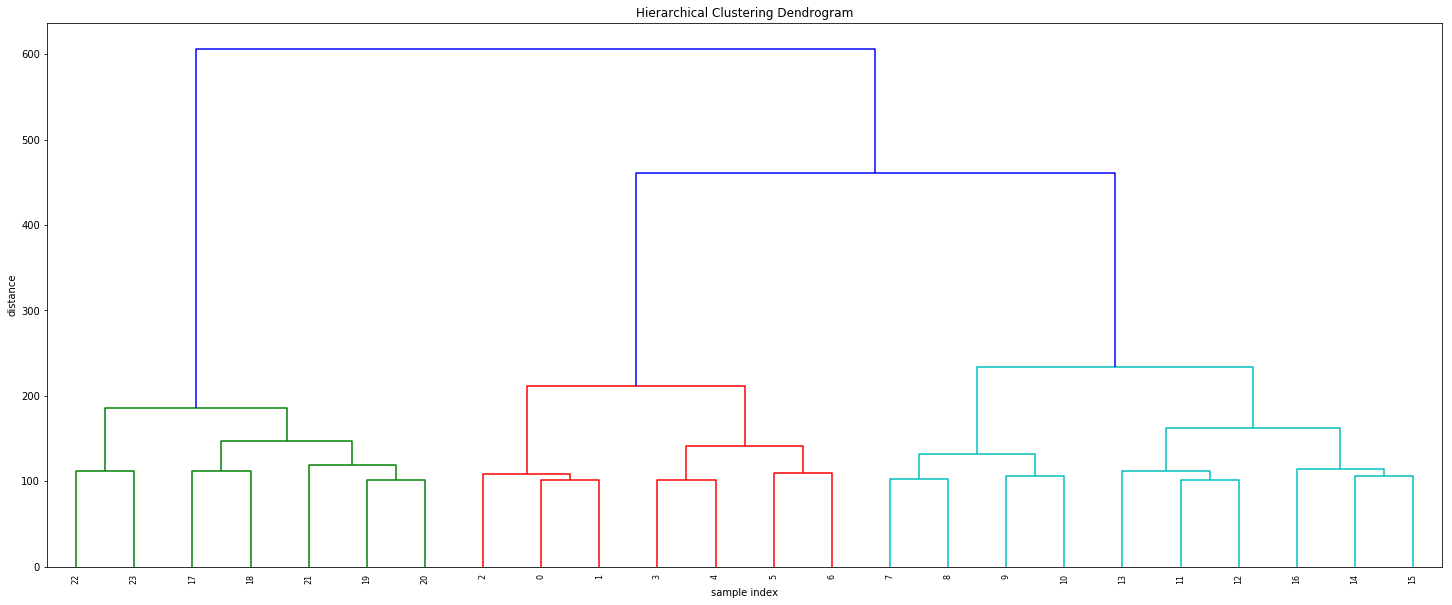

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

temp = lev1_speed_series.loc[:,['heure','dy','KWH/hh (per half hour) ']]
temp = temp.set_index(data_2014.heure)
temp = data_2014.pivot_table(index=['heure'],columns = ['dy'],values = ['KWH/hh (per half hour) '],fill_value=0)

temp.head()

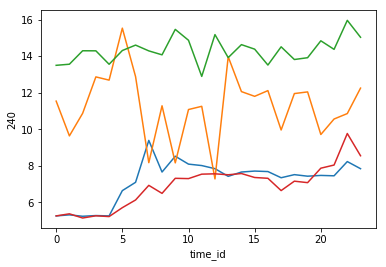

In [ ]:
sns.lineplot(x="time_id", y=129, data=lev1_speed_series)
sns.lineplot(x="time_id", y=192, data=lev1_speed_series)
sns.lineplot(x="time_id", y=209, data=lev1_speed_series)
sns.lineplot(x="time_id", y=240, data=lev1_speed_series)

In [ ]:
# lev1_speed_series.index.get_values()
lev1_speed_series.head()

,129,192,209,210,211,217,218,219,239,240,...,73747,73748,73749,73750,74260,74261,74262,74263,74264,time_id
time_slot,,,,,,,,,,,,,,,,,,,,,
0,5.262087,11.541387,13.499228,13.241821,15.262130,13.470362,13.910000,8.651198,13.214375,5.262087,...,4.368837,5.021993,4.717190,5.142963,4.226585,7.439959,9.104255,10.829211,3.327814,0
1,5.319430,9.639582,13.559660,14.124331,14.694394,13.820410,13.745017,6.471038,12.276089,5.376772,...,4.370828,4.258668,6.928518,5.377178,4.076135,7.069966,11.609077,11.709689,3.449040,1
2,5.242973,10.873068,14.295308,12.994787,14.462469,11.246103,11.268502,6.883607,10.489712,5.147402,...,2.823083,5.259753,6.070096,4.451160,4.092027,7.122479,9.694894,10.828500,3.412367,2
3,5.281201,12.866155,14.292146,12.886662,15.117750,12.399220,12.538622,6.677323,10.110933,5.268458,...,3.763052,5.975579,4.352670,4.313859,4.179139,7.032266,11.001349,12.480295,3.242412,3
4,5.262087,12.689641,13.556888,13.694101,13.956729,10.809044,9.694035,6.780465,7.533775,5.225982,...,3.135696,4.632052,4.051335,4.481198,4.063385,7.048943,10.269736,12.968915,3.854915,4


In [ ]:
speed_series = lev1_speed_series.melt('time_id', var_name='cols',  value_name='vals')

In [ ]:
speed_series

,time_id,cols,vals
0,0,129,5.262087
1,1,129,5.319430
2,2,129,5.242973
3,3,129,5.281201
4,4,129,5.262087
5,5,129,6.645168
6,6,129,7.099823
7,7,129,9.392215
8,8,129,7.662376
9,9,129,8.527295


In [ ]:
g = sns.factorplot(x="time_id", y="vals", hue='cols', data=speed_series)

In [ ]:
sns.set(style="darkgrid")
sns.lineplot(x="time_id", y="vals", hue="cols", data=speed_series)

/home/shahid/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


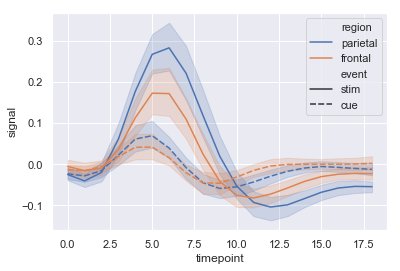

In [ ]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data= fmri)


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
